In [82]:
# importing necessary modules

import tensorflow as tf
import numpy as np
import os
import random
import cv2
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from glob import glob

import random

In [57]:
# creating a path object

paths = np.sort(np.array(glob('/content/drive/MyDrive/Colab Notebooks/innovative_skills/Assignment/*')))

In [58]:
# function for listing images and their corresponding labels

def img_label_sorter(data_paths):

    img_list = []
    label_list = []

    for j in range(len(data_paths)):
      path = data_paths[j]+'/*'
      img_path = np.array(glob(path))


      for img in img_path:
          image = cv2.imread(img)
          image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)/255
          img_list.append(tf.image.resize(image,[128,128]))
          label_list.append([j])


    return np.array(img_list),np.array(label_list)

In [59]:
# listing images and their corresponding labels
images, labels = img_label_sorter(paths)
n_classes = np.max(labels)+1
print(n_classes)

6


In [60]:
# checking the shape of images and labels
images.shape, labels.shape

((180, 128, 128, 3), (180, 1))

In [62]:
np.unique(labels, return_counts = True)

(array([0, 1, 2, 3, 4, 5]), array([30, 30, 30, 30, 30, 30]))

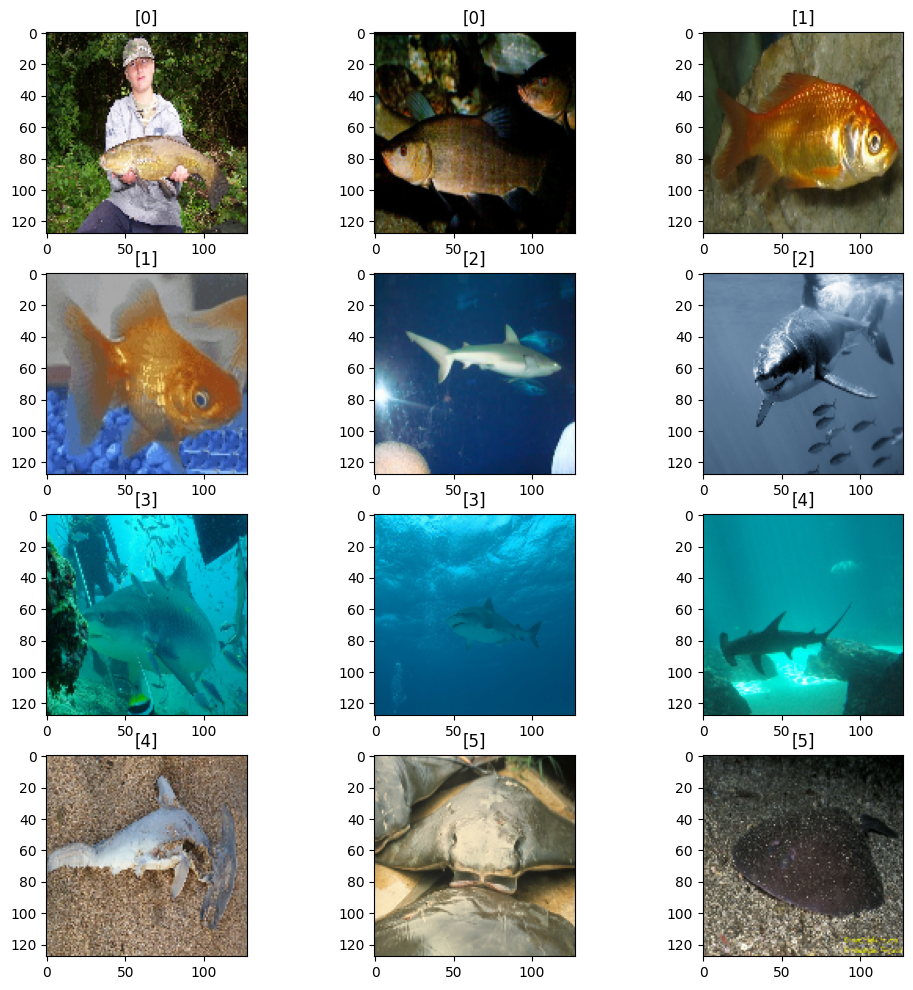

In [95]:
# showing 2 random images from each class

n_rows = 4
n_cols = 3
total_img = len(images)
n_classes = 6
n_sample = 2
bolck_size = (total_img//(n_classes*n_sample))

fig, axes = plt.subplots(n_rows,n_cols, figsize=(12,12))

for i, image, label, ax in zip(range(n_classes*n_sample), images, labels, axes.flat):
  start = bolck_size*i
  end = bolck_size*(i+1) - 1
  n = random.randint(start, end)
  ax.imshow(images[n])
  ax.set_title(labels[n])
  # print(i)

In [92]:
# creating pipeline
image_pipeline = tf.data.Dataset.from_tensor_slices((images, labels)).batch(10).shuffle(1000)

In [94]:
# showing the shape of all batches
c = 18
for i in range(c):
  j, l = next(iter(image_pipeline))
  print('data and label shape of batch no.', i)
  print(j.shape, l.shape)

data and label shape of batch no. 0
(10, 128, 128, 3) (10, 1)
data and label shape of batch no. 1
(10, 128, 128, 3) (10, 1)
data and label shape of batch no. 2
(10, 128, 128, 3) (10, 1)
data and label shape of batch no. 3
(10, 128, 128, 3) (10, 1)
data and label shape of batch no. 4
(10, 128, 128, 3) (10, 1)
data and label shape of batch no. 5
(10, 128, 128, 3) (10, 1)
data and label shape of batch no. 6
(10, 128, 128, 3) (10, 1)
data and label shape of batch no. 7
(10, 128, 128, 3) (10, 1)
data and label shape of batch no. 8
(10, 128, 128, 3) (10, 1)
data and label shape of batch no. 9
(10, 128, 128, 3) (10, 1)
data and label shape of batch no. 10
(10, 128, 128, 3) (10, 1)
data and label shape of batch no. 11
(10, 128, 128, 3) (10, 1)
data and label shape of batch no. 12
(10, 128, 128, 3) (10, 1)
data and label shape of batch no. 13
(10, 128, 128, 3) (10, 1)
data and label shape of batch no. 14
(10, 128, 128, 3) (10, 1)
data and label shape of batch no. 15
(10, 128, 128, 3) (10, 1)
da